# Data Challenge Assignment - Pathrise Data Analysis

In [687]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import requests
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [688]:
url="https://raw.githubusercontent.com/shreyus3003/pathrise/master/Data_Pathrise.xlsx"
file=requests.get(url).content
df = pd.DataFrame(pd.read_excel(file))

In [689]:
# file_path = "/content/Data_Pathrise.xlsx"
# df = pd.DataFrame(pd.read_excel(file_path))

In [690]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


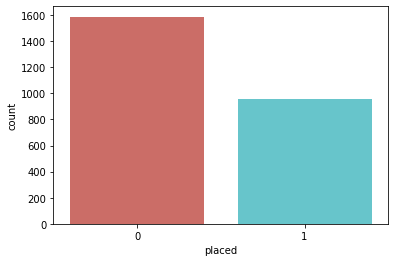

In [691]:
sns.countplot(x='placed',data=df, palette='hls')
plt.show()

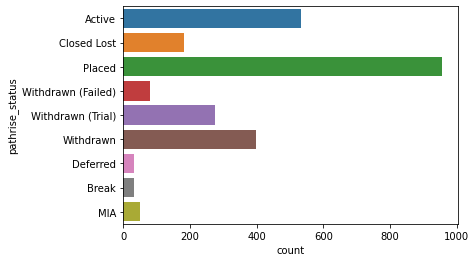

In [692]:
sns.countplot(y="pathrise_status", data=df)
plt.show()

df_n is the data obtained by droping the null values from program_duration_days column.

In [693]:
df_n = df.dropna(subset=['program_duration_days'])

In [694]:
df.dtypes

id                               int64
pathrise_status                 object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
dtype: object

In [695]:
df_n.isnull().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       6
program_duration_days            0
placed                           0
employment_status              182
highest_level_of_education      42
length_of_job_search            66
biggest_challenge_in_search     20
professional_experience        161
work_authorization_status      221
number_of_interviews           172
number_of_applications           0
gender                         371
race                            13
dtype: int64

In [696]:
df_n.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,1928.000000,1928.000000,1928.000000,1756.000000,1928.000000
mean,1264.159751,136.098548,0.495851,2.203872,36.685166
std,736.662410,125.860248,0.500112,2.958306,52.729523
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,654.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1911.500000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [697]:
# df_pathrise = df_n.drop(['id', 'work_authorization_status', 'gender', 'race'], axis=1)

In [698]:
df_pathrise = df_n.drop(['id', 'gender', 'race'], axis=1)

## Final data to obtain insights.
Obtain the data by removing id, gender and race column which may not be useful from the data. These columns doesnt give much insights from data.

In [699]:
df_pathrise.head()

,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications
2,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0
3,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25
4,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100
5,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100
6,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9


## Bar plot
The below bar plot shows fellows enrolled more are into SWE track compared to other tracks.

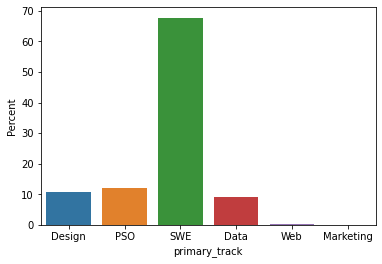

In [700]:
ax = sns.barplot(x="primary_track", y="placed", data=df_pathrise, estimator=lambda x: len(x) / len(df_pathrise) * 100)
ax.set(ylabel="Percent")
plt.show()

More than 70% of pathrise fellows are into SWE track.

In [701]:
df_dur = df_pathrise[df_pathrise["program_duration_days"] != 0 ]
df_dur = df_dur[df_dur["pathrise_status"] == 'Placed']
df_dur

,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications
4,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100
23,Placed,PSO,NOV19B,193.0,1,Unemployed,Master's Degree,6 months to a year,Hearing back on my applications,1-2 years,Citizen,5.0,4
30,Placed,SWE,NOV19A,73.0,1,Student,Master's Degree,Less than one month,Figuring out which jobs to apply for,1-2 years,F1 Visa/CPT,0.0,1
39,Placed,SWE,NOV19A,83.0,1,Employed Full-Time,Master's Degree,3-5 months,Getting past final round interviews,5+ years,F1 Visa/OPT,NaN,15
54,Placed,SWE,AUG19A,76.0,1,Student,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,F1 Visa/OPT,0.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,Placed,SWE,JAN19B,31.0,1,Student,Bachelor's Degree,NaN,Figuring out which jobs to apply for,Less than one year,NaN,6.0,6
2528,Placed,Design,FEB20A,277.0,1,Student,Doctorate or Professional Degree,Less than one month,Technical interviewing,5+ years,Other,NaN,45
2531,Placed,SWE,AUG19A,310.0,1,Unemployed,Doctorate or Professional Degree,Less than one month,Technical skills,NaN,F1 Visa/OPT,0.0,6
2533,Placed,Design,MAR18A,33.0,1,NaN,Bachelor's Degree,1-2 months,Hearing back on my applications,3-4 years,F1 Visa/OPT,0.0,9


[Text(0, 0.5, 'Percent')]

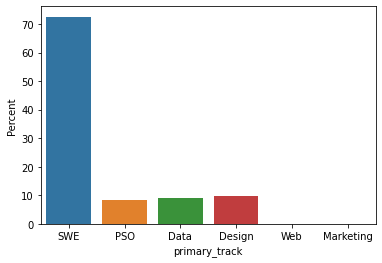

In [702]:
ax = sns.barplot(x="primary_track", y="program_duration_days", data=df_dur, estimator=lambda x: len(x) / len(df_dur) * 100)
ax.set(ylabel="Percent")

## Pathrise fellow status

The below plot shows the pathrise fellow status, a trend of which tack is getting placed more in number. SWE track is more in number joining pathrise and more in number placed through the program.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


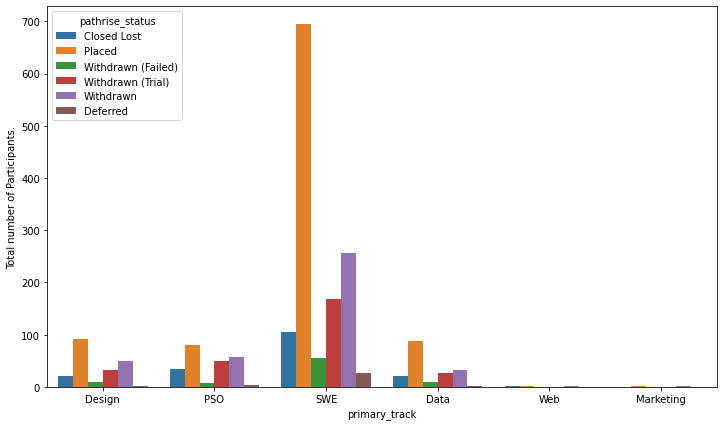

In [703]:
plt.figure(figsize=(12,7))
ax = sns.countplot('primary_track',hue='pathrise_status', data = df_pathrise )
plt.ylabel('Total number of Participants.')
plt.show()

Work authoirization versus pathrise status plot shows a trend of more number of citizens are enrolled in the program and having been placed. F1/OPT number is the second highest who is joining the program.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


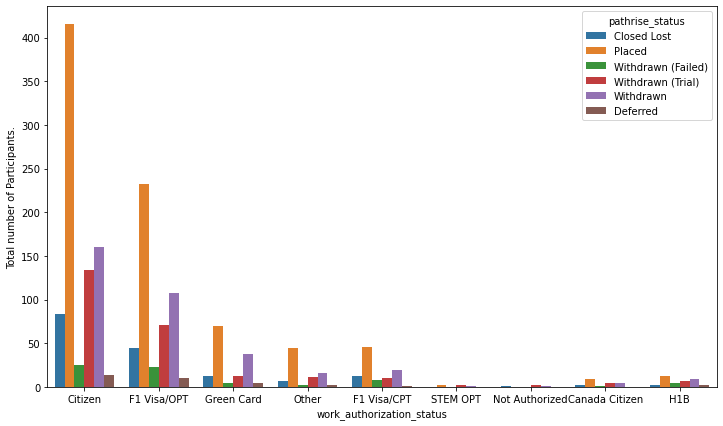

In [704]:
plt.figure(figsize=(12,7))
ax = sns.countplot('work_authorization_status',hue='pathrise_status', data = df_pathrise )
plt.ylabel('Total number of Participants.')
plt.show()

The below plot shows on an average web and marketing track fellows take more number of days in pathrise program to get placed.

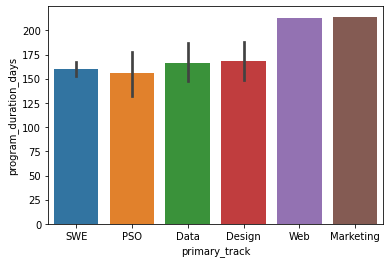

In [705]:
sns.barplot(data=df_dur,x='primary_track', y='program_duration_days')
plt.show()

In [706]:
df_swe = df_dur[df_dur["primary_track"] == 'SWE']
df_swe.shape

(693, 13)

In [707]:
# plt.figure(figsize=(12,7))
# ax = sns.countplot('primary_track',hue='program_duration_days', data = df_swe )
# plt.ylabel('Total number of Participants.')
# plt.show()

In [708]:
df_pathrise.shape


(1928, 13)

## Feature Engineering for prediction.

In [709]:
# file_path = "/content/Data_Pathrise.xlsx"
# df_fe = pd.DataFrame(pd.read_excel(file_path))
df_fe = df.drop(['id', 'gender', 'race'], axis=1)
df_fe.shape

(2544, 13)

In [710]:
from sklearn.preprocessing import OrdinalEncoder

path_enc = OrdinalEncoder()
df_fe["primary_track_code"] = path_enc.fit_transform(df_fe[["primary_track"]])
df_fe[["primary_track", "primary_track_code"]].head(20)

,primary_track,primary_track_code
0,SWE,4.0
1,PSO,3.0
2,Design,1.0
3,PSO,3.0
4,SWE,4.0
5,SWE,4.0
6,SWE,4.0
7,SWE,4.0
8,SWE,4.0
9,SWE,4.0


In [711]:
df_fe = df_fe.dropna(subset=['professional_experience','highest_level_of_education'])
df_fe.shape

(2270, 14)

In [712]:
from sklearn.preprocessing import OneHotEncoder

path_en = OneHotEncoder()
path_exp = path_en.fit_transform(df_fe[["professional_experience"]])
pd.DataFrame(path_exp.toarray(), columns=path_en.categories_).head()

,1-2 years,3-4 years,5+ years,Less than one year
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0


In [713]:
df_fe = df_fe.join(pd.DataFrame(path_exp.toarray(), columns=path_en.categories_))

In [714]:
path_edu = path_en.fit_transform(df_fe[["highest_level_of_education"]])
pd.DataFrame(path_edu.toarray(), columns=path_en.categories_).head()

,Bachelor's Degree,Doctorate or Professional Degree,GED or equivalent,High School Graduate,Master's Degree,"Some College, No Degree",Some High School
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [715]:
df_fe = df_fe.join(pd.DataFrame(path_edu.toarray(), columns=path_en.categories_))

In [716]:
df_fe.shape

(2270, 25)

## Real time test data extraction.


In [717]:
df_active = df_fe[df_fe["pathrise_status"] == 'Active']

In [718]:
df_active = df_active.drop(['program_duration_days'], axis=1)

Let the active fellows be the real time test data to check if they will get placed.

In [719]:
df_active.shape

(466, 24)

In [720]:
df_active.head()

,pathrise_status,primary_track,cohort_tag,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,primary_track_code,"(1-2 years,)","(3-4 years,)","(5+ years,)","(Less than one year,)","(Bachelor's Degree,)","(Doctorate or Professional Degree,)","(GED or equivalent,)","(High School Graduate,)","(Master's Degree,)","(Some College, No Degree,)","(Some High School,)"
0,Active,SWE,OCT19A,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Active,PSO,JAN20A,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,Active,SWE,AUG19B,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14,Active,PSO,DEC19A,0,Employed Full-Time,Bachelor's Degree,1-2 months,Technical skills,1-2 years,Citizen,2.0,35,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15,Active,PSO,JAN20A,0,Employed Full-Time,Bachelor's Degree,3-5 months,Getting past mid-stage interviews,Less than one year,Citizen,1.0,25,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [721]:
df_active_test = df_active.drop(['pathrise_status', 'primary_track', 'cohort_tag', 'placed','employment_status ', 'highest_level_of_education', 'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status'], axis=1)

In [722]:
df_active_test.head()

,number_of_interviews,number_of_applications,primary_track_code,"(1-2 years,)","(3-4 years,)","(5+ years,)","(Less than one year,)","(Bachelor's Degree,)","(Doctorate or Professional Degree,)","(GED or equivalent,)","(High School Graduate,)","(Master's Degree,)","(Some College, No Degree,)","(Some High School,)"
0,2.0,900,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1.0,5,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14,2.0,35,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15,1.0,25,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [723]:
df_active_test = df_active_test.dropna()
df_active_test.shape

(384, 14)

In [724]:
df_fe.isna().sum()

pathrise_status                          0
primary_track                            0
cohort_tag                               8
program_duration_days                  543
placed                                   0
employment_status                      207
highest_level_of_education               0
length_of_job_search                    67
biggest_challenge_in_search             20
professional_experience                  0
work_authorization_status              254
number_of_interviews                   207
number_of_applications                   0
primary_track_code                       0
(1-2 years,)                           235
(3-4 years,)                           235
(5+ years,)                            235
(Less than one year,)                  235
(Bachelor's Degree,)                   235
(Doctorate or Professional Degree,)    235
(GED or equivalent,)                   235
(High School Graduate,)                235
(Master's Degree,)                     235
(Some Colle

# Predictive Model
This is a logistic regression model that predicts wheather an active member will be placed or not.
## Selecting various features for the prediction model.
df_x1 = removed "program_duration_days"<br>
df_x2 = keeping "program_duration_days"<br>
df_x3 = removed "program_duration_days" and "number of interviews"

In [725]:
df_x1 = df_fe.drop(['pathrise_status','program_duration_days','primary_track','employment_status ','cohort_tag', 'highest_level_of_education','professional_experience', 'length_of_job_search', 'biggest_challenge_in_search', 'work_authorization_status', 'number_of_applications'],axis=1 )
df_x2 = df_fe.drop(['pathrise_status','primary_track','employment_status ','cohort_tag', 'highest_level_of_education','professional_experience', 'length_of_job_search', 'biggest_challenge_in_search', 'work_authorization_status','number_of_applications'],axis=1 )
df_x3 = df_fe.drop(['pathrise_status','program_duration_days','primary_track','employment_status ','cohort_tag', 'highest_level_of_education','professional_experience', 'length_of_job_search', 'biggest_challenge_in_search', 'work_authorization_status', 'number_of_applications','number_of_interviews'],axis=1 )

In [726]:
df_x1.head(2)

,placed,number_of_interviews,primary_track_code,"(1-2 years,)","(3-4 years,)","(5+ years,)","(Less than one year,)","(Bachelor's Degree,)","(Doctorate or Professional Degree,)","(GED or equivalent,)","(High School Graduate,)","(Master's Degree,)","(Some College, No Degree,)","(Some High School,)"
0,0,2.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## For employment prediction.
To check if a fellow will get placed.
droping duration of days.

In [727]:
df_x1 = df_x1.dropna()
df_x2 = df_x2.dropna()
df_x3 = df_x3.dropna()
print(df_x1.shape)
print(df_x2.shape)
print(df_x3.shape)

(1847, 14)
(1401, 15)
(2035, 13)


In [728]:
y_x1 = df_x1['placed']
y_x2 = df_x2['placed']
y_x3 = df_x3['placed']

In [729]:
df_x1 = df_x1.drop(['placed'], axis=1)
df_x2 = df_x2.drop(['placed'], axis=1)
df_x3 = df_x3.drop(['placed'], axis=1)


In [730]:
df_x1

,number_of_interviews,primary_track_code,"(1-2 years,)","(3-4 years,)","(5+ years,)","(Less than one year,)","(Bachelor's Degree,)","(Doctorate or Professional Degree,)","(GED or equivalent,)","(High School Graduate,)","(Master's Degree,)","(Some College, No Degree,)","(Some High School,)"
0,2.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2266,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2267,3.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2268,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


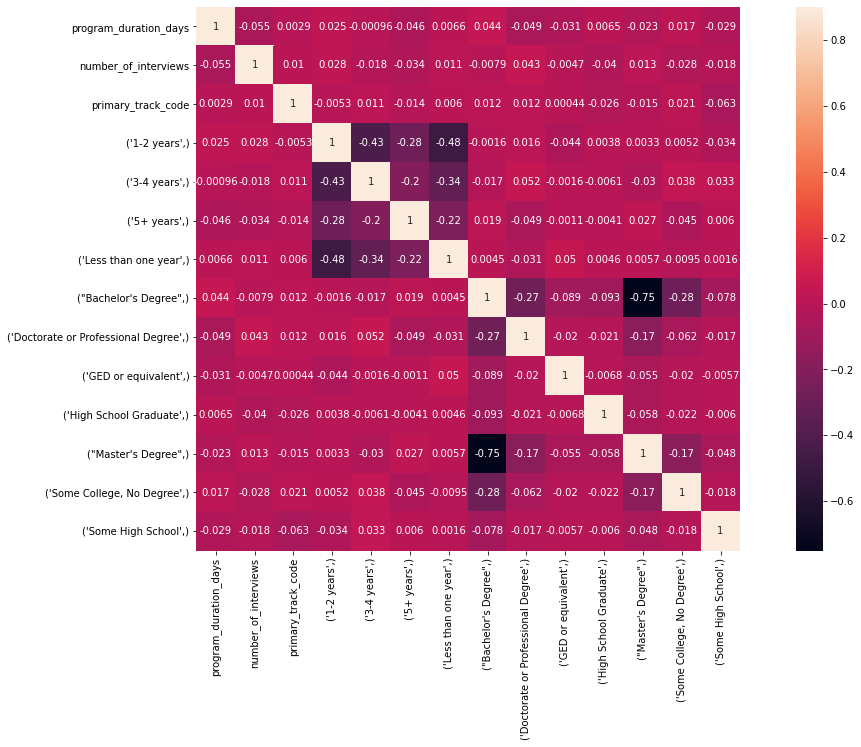

In [731]:
correlation = df_x2.corr(method='pearson')
fig, ax = plt.subplots(figsize = (30,20))
fig.set_size_inches(20,10)
sns.heatmap(correlation,vmax = 0.9, square = True, annot = True)
plt.show()

Accuarcy of model with "program_duration_days" feature removed

In [732]:
x_train,x_test,y_train,y_test=train_test_split(df_x1,y_x1,test_size=0.2,random_state=50)
logit_x1=LogisticRegression(solver='liblinear')
logit_x1.fit(x_train,y_train)
logit_predict=logit_x1.predict(x_test)
accuracy_score(y_test,logit_predict)

0.5891891891891892

Accuarcy of model keeping "program_duration_days" feature

In [733]:
x_train,x_test,y_train,y_test=train_test_split(df_x2,y_x2,test_size=0.2,random_state=50)
logit_x2=LogisticRegression(solver='liblinear')
logit_x2.fit(x_train,y_train)
logit_predict=logit_x2.predict(x_test)
accuracy_score(y_test,logit_predict)

0.6334519572953736

Accuarcy of model removing "program_duration_days" and "number of interviews" features.

In [734]:
x_train,x_test,y_train,y_test=train_test_split(df_x3,y_x3,test_size=0.2,random_state=50)
logit_x3=LogisticRegression(solver='liblinear')
logit_x3.fit(x_train,y_train)
logit_predict=logit_x3.predict(x_test)
accuracy_score(y_test,logit_predict)

0.6167076167076168

## Confusion matrix

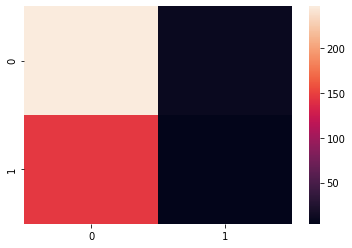

In [735]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,logit_predict)))
plt.show()

# Predicting the duration of days.

df_x2 is used to for prediction.

In [736]:
df_x2

,program_duration_days,number_of_interviews,primary_track_code,"(1-2 years,)","(3-4 years,)","(5+ years,)","(Less than one year,)","(Bachelor's Degree,)","(Doctorate or Professional Degree,)","(GED or equivalent,)","(High School Graduate,)","(Master's Degree,)","(Some College, No Degree,)","(Some High School,)"
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,5.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,89.0,10.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,5.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,26.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2263,208.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2264,313.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2268,336.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [737]:
Y = df_x2['program_duration_days']
X = df_x2.drop(['program_duration_days'], axis=1)
print(X.shape)
Y.shape

(1401, 13)


(1401,)

In [738]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=50)
linear=LinearRegression()
linear.fit(x_train,y_train)
prediction = linear.predict(x_test)

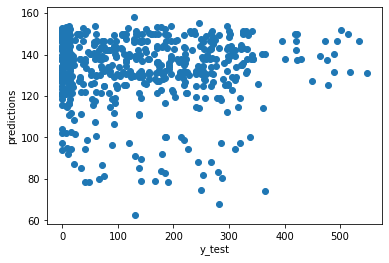

In [739]:
plt.scatter(y_test,prediction)
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

In [740]:
df_active_test_lin = df_active_test.drop(['number_of_applications'], axis=1)
df_active_test_lin.shape

(384, 13)

In [741]:
active_pred = linear.predict(df_active_test_lin)
# print(active_pred)
df_active = df_active.dropna()

In [742]:
y_df = pd.DataFrame(data = active_pred, columns = ['program_duration_days'], index = df_active_test_lin.index.copy())
df_out_duration = pd.merge(df_active, y_df, how = 'left', left_index = True, right_index = True)

# Prediction of duration of days required by an active pathrise fellow to be placed.

In [743]:
df_out_duration

,pathrise_status,primary_track,cohort_tag,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,primary_track_code,"(1-2 years,)","(3-4 years,)","(5+ years,)","(Less than one year,)","(Bachelor's Degree,)","(Doctorate or Professional Degree,)","(GED or equivalent,)","(High School Graduate,)","(Master's Degree,)","(Some College, No Degree,)","(Some High School,)",program_duration_days
0,Active,SWE,OCT19A,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,143.386799
1,Active,PSO,JAN20A,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,135.085876
8,Active,SWE,AUG19B,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,139.409236
14,Active,PSO,DEC19A,0,Employed Full-Time,Bachelor's Degree,1-2 months,Technical skills,1-2 years,Citizen,2.0,35,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,144.179260
15,Active,PSO,JAN20A,0,Employed Full-Time,Bachelor's Degree,3-5 months,Getting past mid-stage interviews,Less than one year,Citizen,1.0,25,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,135.152374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,Active,SWE,JUN18A,0,Employed Full-Time,Master's Degree,6 months to a year,Hearing back on my applications,Less than one year,F1 Visa/OPT,2.0,20,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,143.606416
2253,Active,Data,SEP18C,0,Employed Part-Time,Doctorate or Professional Degree,1-2 months,Getting past final round interviews,3-4 years,Citizen,1.0,40,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,149.019633
2258,Active,PSO,JUL19A,0,Employed Part-Time,Bachelor's Degree,Over a year,Getting past final round interviews,3-4 years,Citizen,0.0,15,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,150.422944
2262,Active,SWE,JAN20A,0,Contractor,Master's Degree,Less than one month,Hearing back on my applications,1-2 years,Other,4.0,160,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,119.643787


# Prediction.

Prediction with the model having highest accuracy from the above.
The active pathrise fellows data is used for prediction to check if they will get placed and below is the result.

In [744]:
df_active_test

,number_of_interviews,number_of_applications,primary_track_code,"(1-2 years,)","(3-4 years,)","(5+ years,)","(Less than one year,)","(Bachelor's Degree,)","(Doctorate or Professional Degree,)","(GED or equivalent,)","(High School Graduate,)","(Master's Degree,)","(Some College, No Degree,)","(Some High School,)"
0,2.0,900,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1.0,5,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14,2.0,35,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15,1.0,25,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,2.0,20,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,1.0,40,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2258,0.0,15,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2262,4.0,160,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [745]:
y_pred_test = logit_x2.predict(df_active_test)
y_pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [746]:
# # print (y_pred_test)
# y_test['placed'] = y_pred_test
# y_test
df_active = df_active.dropna()

In [747]:
y_test_df = pd.DataFrame(data = y_pred_test, columns = ['placed'], index = df_active_test.index.copy())
df_out = pd.merge(df_active, y_test_df, how = 'left', left_index = True, right_index = True)

## The final dataset of active pathrise fellows who are active in the program with the prediction whether the fellow will be placed or not.
## "placed" column is the predicted column.

In [748]:
df_out

,pathrise_status,primary_track,cohort_tag,placed_x,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,primary_track_code,"(1-2 years,)","(3-4 years,)","(5+ years,)","(Less than one year,)","(Bachelor's Degree,)","(Doctorate or Professional Degree,)","(GED or equivalent,)","(High School Graduate,)","(Master's Degree,)","(Some College, No Degree,)","(Some High School,)",placed_y
0,Active,SWE,OCT19A,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,Active,PSO,JAN20A,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
8,Active,SWE,AUG19B,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
14,Active,PSO,DEC19A,0,Employed Full-Time,Bachelor's Degree,1-2 months,Technical skills,1-2 years,Citizen,2.0,35,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15,Active,PSO,JAN20A,0,Employed Full-Time,Bachelor's Degree,3-5 months,Getting past mid-stage interviews,Less than one year,Citizen,1.0,25,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,Active,SWE,JUN18A,0,Employed Full-Time,Master's Degree,6 months to a year,Hearing back on my applications,Less than one year,F1 Visa/OPT,2.0,20,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2253,Active,Data,SEP18C,0,Employed Part-Time,Doctorate or Professional Degree,1-2 months,Getting past final round interviews,3-4 years,Citizen,1.0,40,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2258,Active,PSO,JUL19A,0,Employed Part-Time,Bachelor's Degree,Over a year,Getting past final round interviews,3-4 years,Citizen,0.0,15,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2262,Active,SWE,JAN20A,0,Contractor,Master's Degree,Less than one month,Hearing back on my applications,1-2 years,Other,4.0,160,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
